In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, anderson
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import jarque_bera
from scipy.stats import skew, kurtosis
from scipy.stats import zscore
from scipy.stats import probplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR

## Insight into data

In [2]:
data = pd.read_excel("Rent.csv")
data = pd.DataFrame(data)
data.head()



,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
data.isna().sum()

area    0
rent    0
dtype: int64

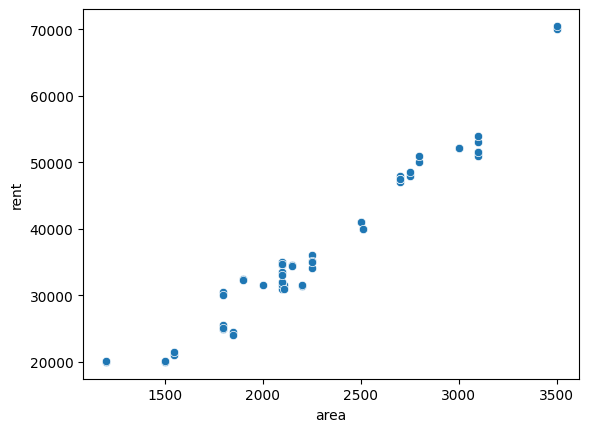

In [4]:
sns.scatterplot(x='area', y='rent', data=data)
plt.show()

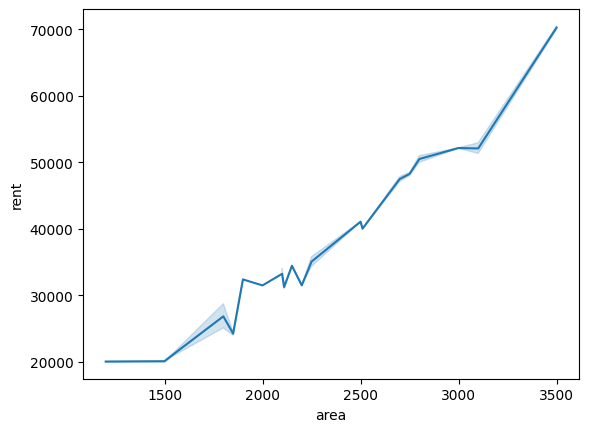

In [5]:
sns.lineplot(x='area', y='rent',data=data)
plt.show()

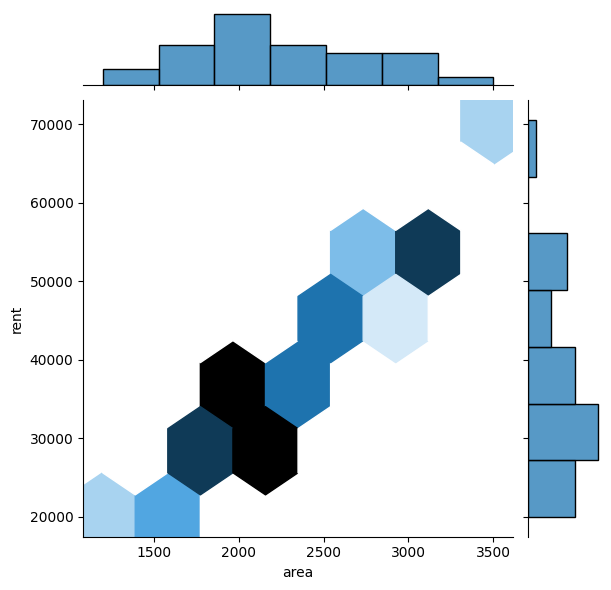

In [6]:
sns.jointplot(x='area',y='rent',data=data,kind='hex')
# kind` must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid']
#in our dataset we dont have null value but if we had we could have used dropna=True
#sns.jointplot(x='area',y='rent',data=data,kind='hex',dropna=True)
plt.show()

there are a few ways to detect outliers 
such as : Z-score,IQR etc.
Z-Score Method:It is effective on data sets that are close to normal distribution.
IQR Method:Useful in general, but also effective on data sets that are NOT normally distributed.

To understand whether the dataset is close to normal distribution or not, we have methods 
Such as; histograms,q-q plots, Shapiro-Wilk Test,Kurtosis and Skewness,Anderson-Darling Test

## Whether normal distribution or not¶


In [7]:
# Shapiro-Wilk test

for column in data.columns:
    stat, p_value = shapiro(data[column])
    print(f'Shapiro-Wilk Test for {column}: {stat}, p-value: {p_value}')
    if p_value > 0.05:
      print("close to normal distribution")
    else:
      print("not close to normal distribution")
    


Shapiro-Wilk Test for area: 0.958588120407186, p-value: 0.04015176190315803
not close to normal distribution
Shapiro-Wilk Test for rent: 0.9262447085714338, p-value: 0.0013811128449923292
not close to normal distribution


In [8]:
# Anderson-Darling test
for column in data.columns:
    stat,critical_values,signigicance_level =anderson(data[column])
    print(f'Anderson-Darling Test for {column}: {stat}')
    print(f'Critical values for {column}: {critical_values}') 
    if stat < critical_values[2]:
        print("close to normal distribution.")
    else:
        print("not close to normal distribution")
    

Anderson-Darling Test for area: 1.1147199365173392
Critical values for area: [0.544 0.619 0.743 0.866 1.03 ]
not close to normal distribution
Anderson-Darling Test for rent: 1.5210063867200105
Critical values for rent: [0.544 0.619 0.743 0.866 1.03 ]
not close to normal distribution


In [9]:
# Jarque-Bera test
for column in data.columns:
    statistik, p_value = jarque_bera(data[column])
    print(f'Jarque-Bera for {column} : {statistik}')
    print(f'p-value for {column} : {p_value}')
    if p_value > 0.05:
        print("close to normal distribution")
    else:
        print("not close to normal distribution")

#since our data set is very small for the Jarque-Bera test we wont be considering this test



Jarque-Bera for area : 1.446086302538632
p-value for area : 0.4852732467801327
close to normal distribution
Jarque-Bera for rent : 4.982583606670376
p-value for rent : 0.08280293235229813
close to normal distribution


In [10]:
for column in data.columns:
    skewness = skew(data[column])

    print(f'Skewness for {column}: {skewness}')
    

    if -0.5 <= skewness <= 0.5:
        print("The distribution is considered relatively symmetric.")
    elif -1 <= skewness < -0.5 or 0.5 < skewness <= 1:
        print("The distribution is slightly skewed.")
    elif skewness < -1 or skewness > 1:
        print("The distribution is significantly skewed.")
    else:
        print("Invalid skewness value.")



Skewness for area: 0.303019150444268
The distribution is considered relatively symmetric.
Skewness for rent: 0.7000880124443039
The distribution is slightly skewed.


## as a majority we can say our data set is not normal distributed.

## IQR Method

In [11]:
def calculate_iqr(data):
    for column in data.columns:
        q1 = np.percentile(data[column], 25)
        print(f'{column} : {q1}')
        q3 = np.percentile(data[column], 75)
        print(f'{column} : {q3}')
        iqr = q3 - q1
    return iqr


In [12]:
def finding_outliers(data):
    outliers = {}
    for column in data.columns:
        q1 = np.percentile(data[column], 25)
        print(f'{column} Q1: {q1}')
        q3 = np.percentile(data[column], 75)
        print(f'{column} Q3: {q3}')
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        column_outliers = [value for value in data[column] if value < lower_bound or value > upper_bound]
        outliers[column] = column_outliers
    return outliers


In [13]:
new=finding_outliers(data)
new

area Q1: 1900.0
area Q3: 2700.0
rent Q1: 31000.0
rent Q3: 47625.0


{'area': [], 'rent': []}

## Z-Score Method

In [14]:
from scipy.stats import zscore

In [15]:
scores = zscore(data)
scores

,area,rent
0,-0.540823,-0.494264
1,-0.353687,-0.194407
2,0.394857,0.323917
3,-0.072983,-0.100166
4,1.330536,1.270608
5,-0.727959,-0.408591
6,-1.476502,-1.479508
7,-0.821527,-1.093978
8,0.769129,0.919347
9,-0.353687,-0.537101


In [16]:
for column in data.columns:
    z_scores = stats.zscore(data[column])
    threshold=2.576 #99%
    #threshold=1.96 #95%
    outliers_zscore  =  (np.abs(z_scores) > threshold)
    print(f'{column} : {outliers_zscore}')

area : 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
Name: area, dtype: bool
rent : 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20

In [17]:
outliers_zscore.sum()

2

In [18]:
outliers_index=data[outliers_zscore].index
outliers_index

Index([22, 52], dtype='int64')

In [19]:
data.loc[outliers_index]

,area,rent
22,3500,70000
52,3500,70500


In [20]:
mean_value=data['rent'].mean()
mean_value

37269.166666666664

# There is two way to round the number

new = str(mean_value) integer,decimal = new.split('.') integer = int(integer) integer

In [21]:
rounded = round(mean_value)
rounded

37269

In [22]:
df = pd.DataFrame(data)
df.loc[outliers_index,'rent'] = rounded

In [23]:
df.loc[outliers_index]

,area,rent
22,3500,37269
52,3500,37269


In [24]:
correlation_matrix = df.corr()
correlation_matrix

,area,rent
area,1.000000,0.894183
rent,0.894183,1.000000


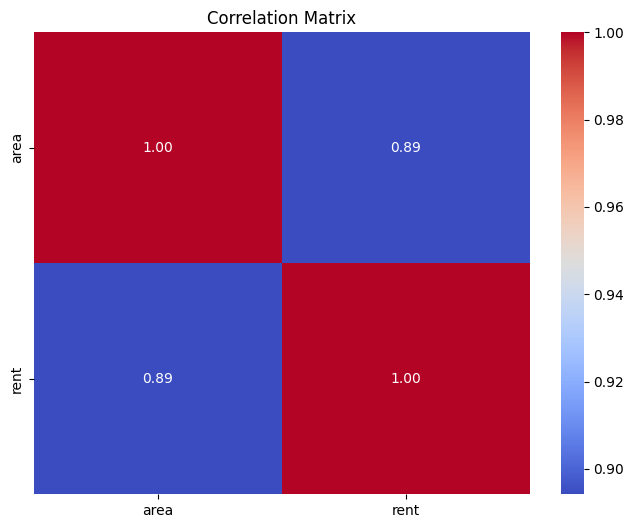

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

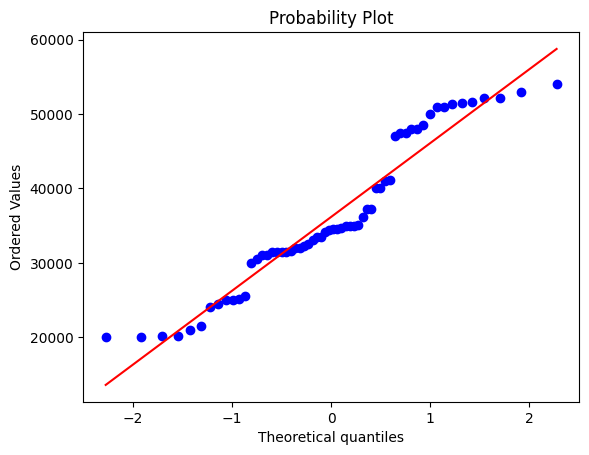

In [26]:
from scipy.stats import probplot
probplot(df['rent'], plot=plt)
plt.show()

## Standardization

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [29]:
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)

In [30]:
scaled_data.head()

,area,rent
0,-0.540823,-0.469873
1,-0.353687,-0.117705
2,0.394857,0.491043
3,-0.072983,-0.007023
4,1.330536,1.602888


## ML PART

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

## Linear Regression 

In [32]:
X=df.area
y=df.rent
X = pd.DataFrame(X)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
X_train

,area
31,2100
3,2250
52,3500
17,1550
8,2700
6,1500
40,2150
4,3000
43,2510
19,2700


In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
model.score(X_test,y_test)

0.906969086338823

In [37]:
def predict_rent(area):
    x = np.zeros(len(X.columns))
    x[0]= area
    prediction =model.predict([x])[0]
    predict = np.round(prediction)
    return predict

In [38]:
rent_value= predict_rent(1760)
print(f'predict:{rent_value}')


predict:27586.0


C:\Users\zyare\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
import pickle 
with open('basic_home_price_model.pkl', 'wb') as f:
    pickle.dump(model,f)

In [40]:
import json 
columns ={
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))